In [1]:

!pip install -q seaborn scikit-learn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [3]:
 #Charger les données
df = sns.load_dataset('titanic')
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
#  Aperçu rapide
print(df.shape)
df.info()
df.describe(include='all')


(891, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#  Analyse des valeurs manquantes
missing = df.isnull().sum().sort_values(ascending=False)
missing_pct = (df.isnull().mean()*100).sort_values(ascending=False)
pd.concat([missing, missing_pct], axis=1, keys=['count','percent'])


,count,percent
deck,688,77.216611
age,177,19.865320
embarked,2,0.224467
embark_town,2,0.224467
sex,0,0.000000
pclass,0,0.000000
survived,0,0.000000
fare,0,0.000000
parch,0,0.000000
sibsp,0,0.000000


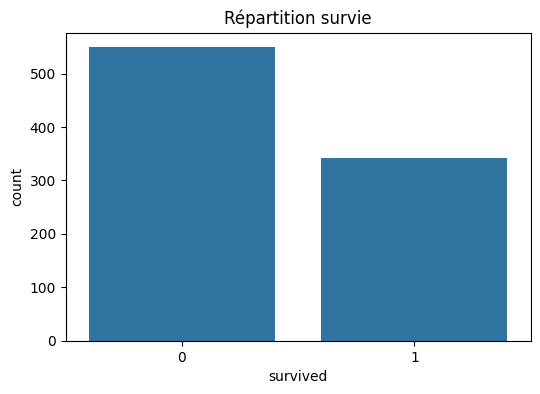

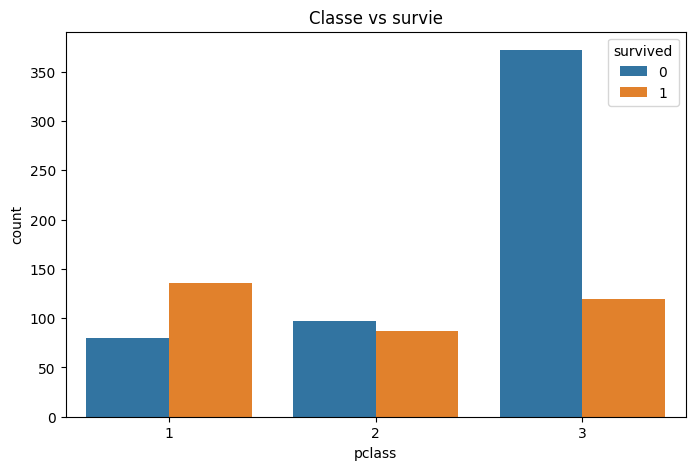

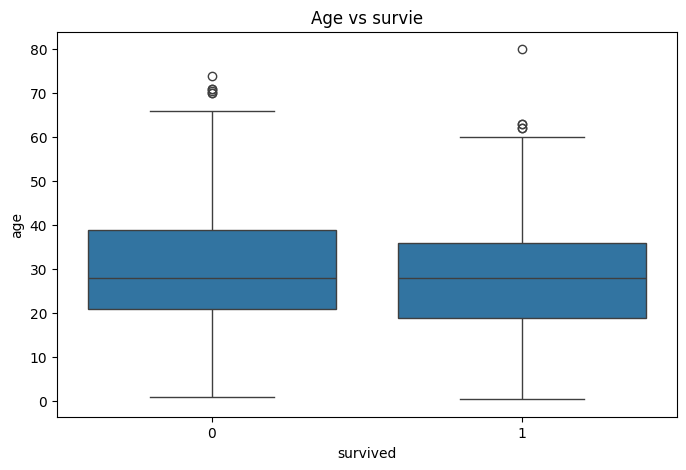

In [6]:
#  Visualisations simples
plt.figure(figsize=(6,4))
sns.countplot(x='survived', data=df)
plt.title('Répartition survie')

plt.figure(figsize=(8,5))
sns.countplot(x='pclass', hue='survived', data=df)
plt.title('Classe vs survie')

plt.figure(figsize=(8,5))
sns.boxplot(x='survived', y='age', data=df)
plt.title('Age vs survie')
plt.show()


In [7]:
#  Choix des features
# Je choisis : pclass, sex, age, sibsp, parch, fare, embarked
cols = ['pclass','sex','age','sibsp','parch','fare','embarked']
X = df[cols]
y = df['survived']


In [8]:
#  Prétraitement : pipeline pour numériques et catégoriques
num_features = ['age','sibsp','parch','fare']
cat_features = ['pclass','sex','embarked']

num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])


In [9]:
#  Split train/test et pipeline complet avec modèle
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

pipe = Pipeline(steps=[
    ('preproc', preprocessor),
    ('model', LogisticRegression(max_iter=1000))
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print("Accuracy (LogisticRegression):", accuracy_score(y_test, y_pred))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))


Accuracy (LogisticRegression): 0.7757847533632287

Confusion matrix:
 [[115  22]
 [ 28  58]]

Classification report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       137
           1       0.72      0.67      0.70        86

    accuracy                           0.78       223
   macro avg       0.76      0.76      0.76       223
weighted avg       0.77      0.78      0.77       223



In [11]:
# Essai rapide : arbre de décision
pipe_tree = Pipeline(steps=[
    ('preproc', preprocessor),
    ('tree', DecisionTreeClassifier(random_state=42, max_depth=5))
])
pipe_tree.fit(X_train, y_train)
y_pred_tree = pipe_tree.predict(X_test)
print("Accuracy (DecisionTree):", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))


Accuracy (DecisionTree): 0.7668161434977578
              precision    recall  f1-score   support

           0       0.77      0.89      0.82       137
           1       0.77      0.57      0.65        86

    accuracy                           0.77       223
   macro avg       0.77      0.73      0.74       223
weighted avg       0.77      0.77      0.76       223



In [12]:
#  Examiner l'importance des features
# Ici, utilisons l'arbre pour récupérer importances (en tenant compte du one-hot)
preproc = pipe_tree.named_steps['preproc']
# Extraire noms colonnes après transformation
ohe = preproc.named_transformers_['cat'].named_steps['onehot']
cat_names = ohe.get_feature_names_out(cat_features)
feature_names = np.concatenate([num_features, cat_names])
importances = pipe_tree.named_steps['tree'].feature_importances_
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
feat_imp.head(10)


,0
sex_female,0.538835
age,0.132421
fare,0.128762
pclass_3,0.118455
pclass_1,0.050911
sibsp,0.022510
parch,0.008106
pclass_2,0.000000
sex_male,0.000000
embarked_C,0.000000
